In [3]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read CSV file
df = pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

In [4]:
df

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
0,2015-01-02,klant_1,0,0,train
1,2015-01-02,klant_100,0,0,train
2,2015-01-02,klant_101,0,0,train
3,2015-01-02,klant_103,0,0,train
4,2015-01-02,klant_104,0,0,train
...,...,...,...,...,...
505695,2020-04-29,klant_95,68,60,test
505696,2020-04-29,klant_96,0,0,test
505697,2020-04-29,klant_97,66,123,test
505698,2020-04-29,klant_98,2035,2133,test


In [5]:
# Manipulate data
df['jaar'] = df['procesdag'].dt.year
new_df = df.groupby([df['cust_id'], df['jaar']]).agg(
    totaal_aantal_pakketten = ('aantal_pakketten', 'sum'),
    totaal_aantal_pakketten_volgende_dag = ('aantal_pakketten_volgende_dag', 'sum')
).reset_index()

In [6]:
# Format X for a given position to millions notation 
def millions_formatter(x, pos) :
    return '%1.1fM' % (x * 1e-5)

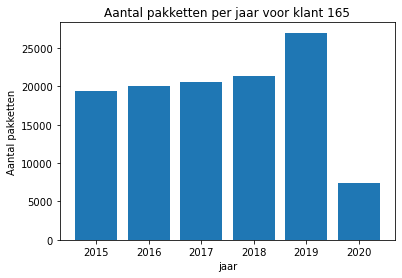

In [7]:
# Define X and Y, 2nd plot  (klant 106)
df_klant165 = new_df.where(new_df['cust_id'] == 'klant_165').dropna()
fig, ax = plt.subplots()
ax.bar(df_klant165['jaar'], df_klant165['totaal_aantal_pakketten'])
ax.set(
    xlabel='jaar',
    ylabel='Aantal pakketten',
    title='Aantal pakketten per jaar voor klant 165')
plt.show()

In [8]:
#manipulate Data
cust_filter = df['cust_id'] == 'klant_165'
df_filter = df['procesdag'].dt.dayofweek <= 4
data = df.where(df_filter & cust_filter).dropna()
data

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,jaar
59,2015-01-02,klant_165,17.0,0.0,train,2015.0
839,2015-01-05,klant_165,56.0,82.0,train,2015.0
1099,2015-01-06,klant_165,82.0,390.0,train,2015.0
1359,2015-01-07,klant_165,390.0,32.0,train,2015.0
1619,2015-01-08,klant_165,32.0,36.0,train,2015.0
...,...,...,...,...,...,...
503939,2020-04-23,klant_165,26.0,47.0,test,2020.0
504199,2020-04-24,klant_165,47.0,0.0,test,2020.0
504979,2020-04-27,klant_165,0.0,119.0,test,2020.0
505239,2020-04-28,klant_165,119.0,70.0,test,2020.0


In [9]:
y = data.aantal_pakketten_volgende_dag
X = data[['procesdag', 'aantal_pakketten']]

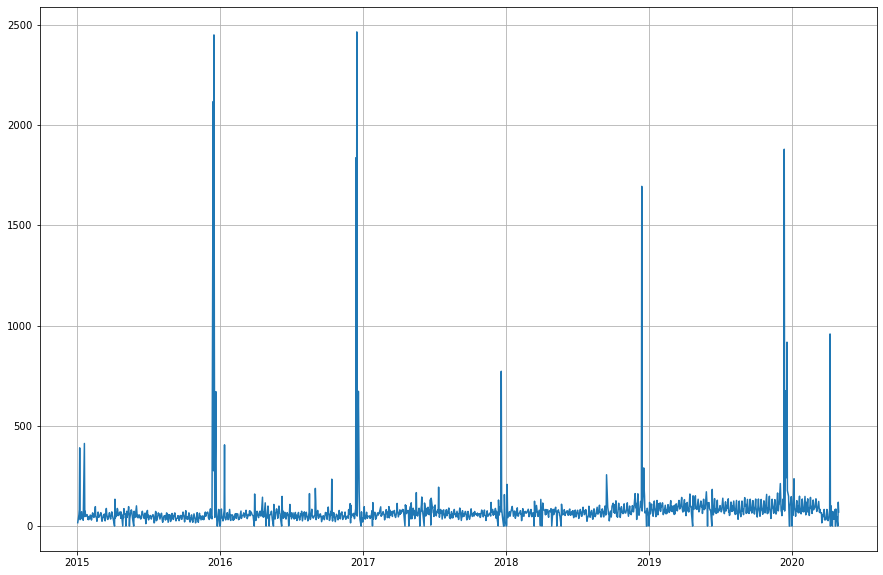

In [10]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(data['procesdag'], data['aantal_pakketten'])
plt.xlabel = ('Procesdag')
plt.ylabel = ('Aantal Pakketten')
plt.title = ('Aantal Pakketten Klant 165')
plt.grid()
plt.show()

In [11]:
data = data.set_index(data.procesdag, drop=True)

In [12]:
data_2015 = data['2015-01-01':'2016-01-01']

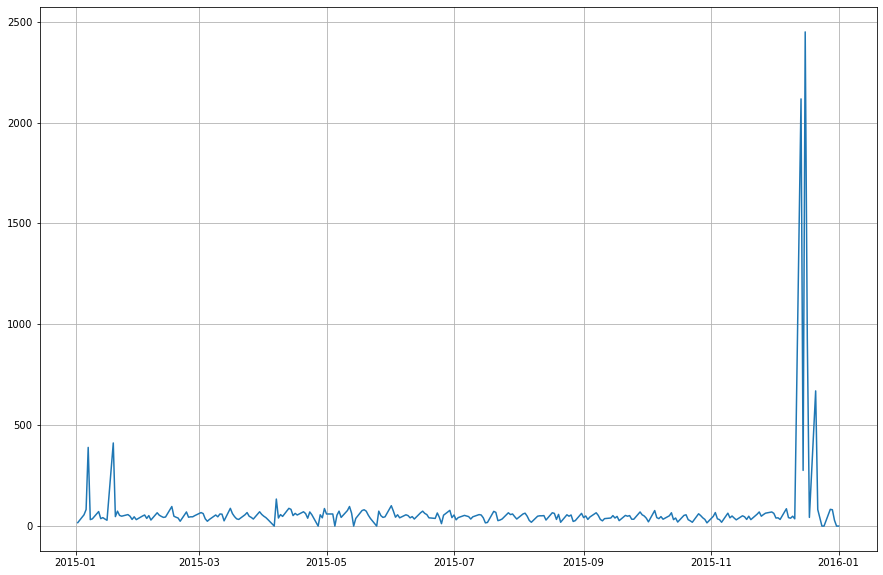

In [13]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(data_2015['procesdag'], data_2015['aantal_pakketten'])
plt.xlabel = ('Procesdag')
plt.ylabel = ('Aantal Pakketten')
plt.title = ('Aantal Pakketten Klant 165')
plt.grid()
plt.show()

In [14]:
data_2015_december = data['2015-12-01':'2016-01-01']

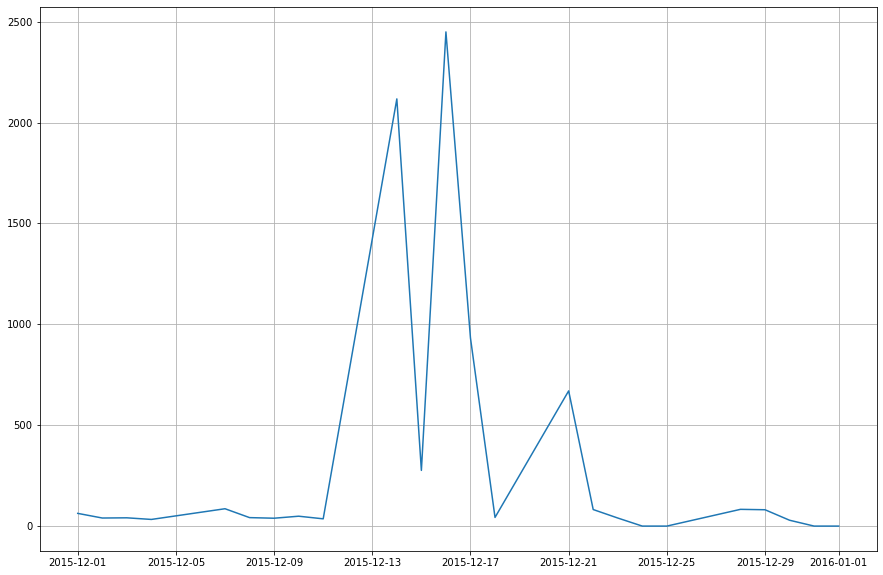

In [15]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(data_2015_december['procesdag'], data_2015_december['aantal_pakketten'])
plt.xlabel = ('Procesdag')
plt.ylabel = ('Aantal Pakketten')
plt.title = ('Aantal Pakketten Klant 165')
plt.grid()
plt.show()

In [16]:
data_2015_oktober = data['2015-10-01':'2015-11-01']

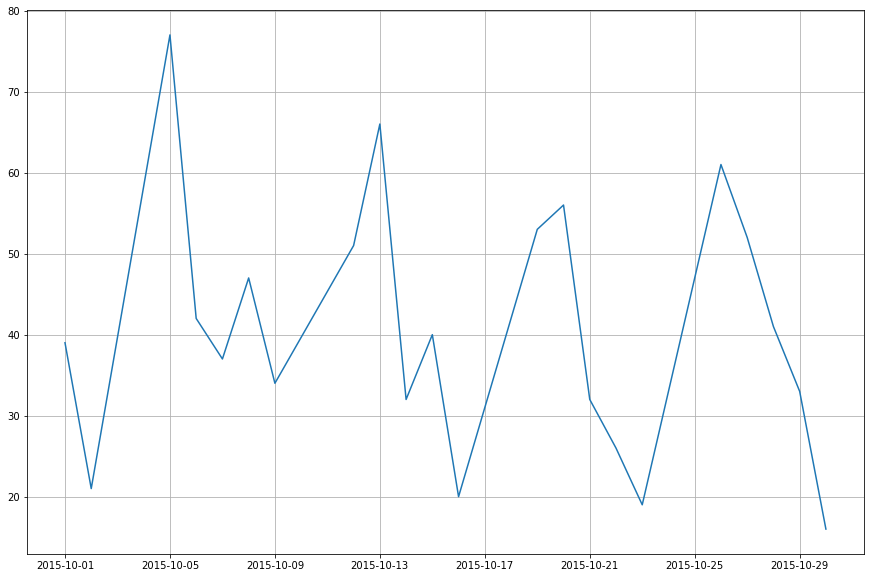

In [17]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(data_2015_oktober['procesdag'], data_2015_oktober['aantal_pakketten'])
plt.xlabel = ('Procesdag')
plt.ylabel = ('Aantal Pakketten')
plt.title = ('Aantal Pakketten Klant 165')
plt.grid()
plt.show()